In [869]:
import math
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
%matplotlib inline

In [870]:
# Generate values
radius = 1
num_points = 500
X = np.zeros(shape=(num_points,2))
Y = np.zeros(num_points)

for i in range(num_points):
  angle = (2*math.pi/num_points)*i
  x = radius * math.cos(angle)
  y = radius * math.sin(angle)

  if x!=0 :
    slope = y/x
  else:
    continue
    slope = float("inf")

  X[i] = [x,y]
  Y[i] = slope


In [871]:
X.shape

(500, 2)

In [872]:
largest_indices = Y.argsort()[-5:]
#indices = largest_indices
smallest_indices = Y.argsort()[:5]
indices = np.concatenate([smallest_indices,largest_indices])
indices

array([376, 126, 127, 377, 128, 373, 374, 124, 375, 125])

In [873]:
# Find the indices of the two largest values


# Delete the two largest values from the array
Y = np.delete(Y, indices)
X = np.delete(X,indices,axis=0)
len(Y)

490

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,
         0.,  0.,  0.,  2.,  0.,  0.,  0.,  2.,  0.,  2.,  0.,  0.,  2.,
         2.,  0.,  2.,  2.,  4.,  2.,  4.,  6.,  8., 10., 18., 28., 54.,
        94., 92., 54., 28., 18., 10.,  8.,  6.,  4.,  2.,  4.,  2.,  2.,
         0.,  2.,  2.,  0.,  0.,  2.,  0.,  2.,  0.,  0.,  0.,  2.,  0.,
         0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-2.65132563e+01, -2.58503201e+01, -2.51873840e+01, -2.45244479e+01,
        -2.38615117e+01, -2.31985756e+01, -2.25356394e+01, -2.18727033e+01,
        -2.12097672e+01, -2.05468310e+01, -1.98838949e+01, -1.92209587e+01,
        -1.85580226e+01, -1.78950865e+01, -1.72321503e+01, -1.65692142e+01,
        -1.59062780e+01, -1.52433419e+01, -1.45804057e+01, -1.39174696e+01,
        -1.32545335e+01, -1.25915973e+01, -1.19286612e

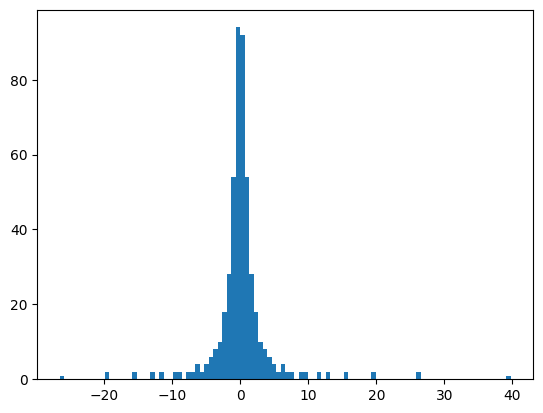

In [874]:
plt.hist(Y,bins=100)

In [875]:
X = torch.from_numpy(X).type(torch.float)
Y = torch.from_numpy(Y).type(torch.float)

In [876]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [877]:
class CircleSlopePredictor(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2,out_features=64)
    self.layer2 = nn.Linear(in_features=64,out_features=1)
    #self.layer3 = nn.Linear(in_features=32,out_features=1)

  def forward(self, x:torch.Tensor):
    x = torch.relu(self.layer1(x))
    #x = torch.relu(self.layer2(x))
    x = self.layer2(x)
    return x

In [878]:
model = CircleSlopePredictor()
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(params=model.parameters(),
                            lr= 0.035)

In [879]:
torch.manual_seed(42)

epochs = 701

for epoch in range(epochs):

  # move model to training mode
  model.train()

  # forward pass
  pred_train = model(X_train)

  # calculate loss
  loss_train = loss_fn(pred_train.squeeze(),Y_train)

  # optimizer zero grad
  optimizer.zero_grad()

  # loss backward
  loss_train.backward()

  # optimizer step
  optimizer.step()

  if epoch%50 == 0:
    model.eval()
    with torch.no_grad():
      pred_test = model(X_test)
      loss_test = loss_fn(pred_test.squeeze(),Y_test)

      print(f"epoch:{epoch} loss_train:{loss_train} loss_test: {loss_test}")

epoch:0 loss_train:2.4131076335906982 loss_test: 1.9166855812072754
epoch:50 loss_train:1.5956099033355713 loss_test: 1.1288933753967285
epoch:100 loss_train:1.4339020252227783 loss_test: 0.9822831153869629
epoch:150 loss_train:1.4403787851333618 loss_test: 0.9419862627983093
epoch:200 loss_train:1.3748793601989746 loss_test: 0.8966963887214661
epoch:250 loss_train:1.4002010822296143 loss_test: 0.8773872256278992
epoch:300 loss_train:1.3257745504379272 loss_test: 0.816874623298645
epoch:350 loss_train:1.2599347829818726 loss_test: 0.8961504101753235
epoch:400 loss_train:1.2723937034606934 loss_test: 0.8093007802963257
epoch:450 loss_train:1.2283728122711182 loss_test: 0.8404044508934021
epoch:500 loss_train:1.2732160091400146 loss_test: 0.743598461151123
epoch:550 loss_train:1.199206829071045 loss_test: 0.7693905234336853
epoch:600 loss_train:1.3950779438018799 loss_test: 0.7522836923599243
epoch:650 loss_train:1.3004660606384277 loss_test: 0.9008610844612122
epoch:700 loss_train:1.237

In [880]:
model.eval()
with torch.no_grad():
  pred = model(X_test)


In [881]:
for i in range(10):
  print(Y_test[i],pred[i])

tensor(-0.3529) tensor([-0.3066])
tensor(-1.2726) tensor([-1.1139])
tensor(-1.0384) tensor([-0.7667])
tensor(2.1251) tensor([2.3631])
tensor(-6.5811) tensor([-1.6164])
tensor(-0.5016) tensor([-0.4366])
tensor(-4.9064) tensor([-3.5625])
tensor(-1.8744) tensor([-1.8577])
tensor(-0.1778) tensor([-0.1309])
tensor(1.4134) tensor([1.3768])


# Circle Radius predictor

In [882]:
import numpy as np
import random
import math

# Function to calculate distance between two points
def distance(x1, y1, x2, y2):
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Initialize an empty array to store the dataset
dataset = np.empty((0, 4))
target = np.empty((0,1))

for _ in range(1000):
    # Random center of circle
    c1 = random.uniform(-100, 100)
    c2 = random.uniform(-100, 100)

    # Random radius
    r = random.uniform(1, 100)

    # Random angle for point on circumference
    angle = random.uniform(0, 2 * math.pi)

    # Calculate x, y coordinates of point on circumference
    x = c1 + r * math.cos(angle)
    y = c2 + r * math.sin(angle)

    # Verify radius calculation
    calculated_r = distance(c1, c2, x, y)

    # Append to dataset as a new row
    dataset = np.append(dataset, [[c1, c2, x, y]], axis=0)
    target = np.append(target,[[calculated_r]], axis=0)

# Print dataset
print(dataset[:5])


[[ 29.62320481  57.17076709  71.97131352   3.02880146]
 [-43.03091774  73.5309536  -60.74718515  59.52622255]
 [-67.67354506 -39.25766472 -36.85476942 -63.24593646]
 [-70.55298978  85.79567905  -1.49306034 100.3448066 ]
 [-16.56590504   5.85875441 -50.69431115 -16.47738566]]


In [883]:
target[:5]

array([[68.73656054],
       [22.58314909],
       [39.05424578],
       [70.57585257],
       [40.78788124]])

In [884]:
X = torch.from_numpy(dataset).type(torch.float)
Y = torch.from_numpy(target).type(torch.float)

In [885]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)


In [886]:
class CircleRadiusPredictor(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=4,out_features=32)
    self.layer2 = nn.Linear(in_features=32,out_features=1)

  def forward(self, x:torch.Tensor):
    x = torch.relu(self.layer1(x))
    x = self.layer2(x)
    return x


In [887]:
model = CircleRadiusPredictor()
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(params=model.parameters(),
                            lr= 0.01)

In [888]:
torch.manual_seed(42)

epochs = 501

for epoch in range(epochs):

  # move model to training mode
  model.train()

  # forward pass
  pred_train = model(X_train)

  # calculate loss
  loss_train = loss_fn(pred_train,Y_train)

  # optimizer zero grad
  optimizer.zero_grad()

  # loss backward
  loss_train.backward()

  # optimizer step
  optimizer.step()

  if epoch%50 == 0:
    model.eval()
    with torch.no_grad():
      pred_test = model(X_test)
      loss_test = loss_fn(pred_test,Y_test)

      print(f"epoch:{epoch} loss_train:{loss_train} loss_test: {loss_test}")



epoch:0 loss_train:47.576229095458984 loss_test: 42.95103454589844
epoch:50 loss_train:10.539423942565918 loss_test: 10.4960298538208
epoch:100 loss_train:0.9344711303710938 loss_test: 0.887162983417511
epoch:150 loss_train:0.42488807439804077 loss_test: 0.5347766876220703
epoch:200 loss_train:0.6204544901847839 loss_test: 0.4762089252471924
epoch:250 loss_train:0.38068851828575134 loss_test: 0.4885430634021759
epoch:300 loss_train:0.34849101305007935 loss_test: 0.5194951891899109
epoch:350 loss_train:0.3635343313217163 loss_test: 0.37216055393218994
epoch:400 loss_train:0.293771892786026 loss_test: 0.40491268038749695
epoch:450 loss_train:0.35546135902404785 loss_test: 0.2929340600967407
epoch:500 loss_train:0.37036246061325073 loss_test: 0.3594595789909363


In [889]:
model.eval()
with torch.no_grad():
  pred = model(X_test)

In [890]:
Y_test[:5]

tensor([[85.0991],
        [95.2893],
        [33.3550],
        [96.3023],
        [33.2964]])

In [891]:
pred[:5]

tensor([[85.1701],
        [94.7449],
        [33.0308],
        [95.4866],
        [32.7652]])